In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

tree_model = DecisionTreeRegressor()
lin_model = make_pipeline(StandardScaler(), LinearRegression())

tree_cv = cross_validate(tree_model, data_numerical, target, cv=10)
lin_cv = cross_validate(lin_model, data_numerical, target, cv=10)

In [6]:
lin_model_wins = sum([dif>0 for dif in list(lin_cv['test_score'] - tree_cv['test_score'])])

print(f"linear model performs better on {lin_model_wins}/10 folds ")

linear model performs better on 9/10 folds 


In [14]:
from sklearn.model_selection import GridSearchCV


params = {'max_depth':list(range(1,16))}
tree_model_grid = cross_validate(GridSearchCV(DecisionTreeRegressor(), params, cv=10),  data_numerical, target, cv=10, return_estimator=True)

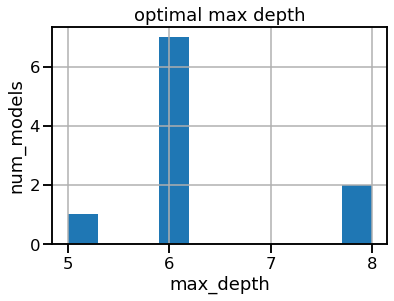

In [32]:
ax = pd.Series([model.best_params_['max_depth'] for model in tree_model_grid['estimator']]).hist()

_ = ax.set_title('optimal max depth')
_ = ax.set_xlabel('max_depth')
_ = ax.set_ylabel('num_models')

In [37]:
for i in range(0,6):
    tree_model_grid = cross_validate(GridSearchCV(DecisionTreeRegressor(random_state=i), params, cv=10),  data_numerical, target, cv=10, return_estimator=True, n_jobs=-1)
    lin_model_wins = sum([dif>0 for dif in list(lin_cv['test_score'] - tree_model_grid['test_score'])])
    print(f"linear model performs better on {lin_model_wins}/10 folds ")

linear model performs better on 8/10 folds 
linear model performs better on 8/10 folds 
linear model performs better on 8/10 folds 
linear model performs better on 8/10 folds 
linear model performs better on 9/10 folds 
linear model performs better on 8/10 folds 


In [51]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OrdinalEncoder

categorical_selector = make_column_selector(dtype_include=object)
numerical_selector = make_column_selector(dtype_exclude=object)

categorical_columns = categorical_selector(data)
numerical_columns = numerical_selector(data)

preprocessor = ColumnTransformer([('ordinal-encoder', OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=-1), categorical_columns),("passthrough","passthrough", numerical_columns)])

model = make_pipeline(preprocessor, DecisionTreeRegressor(max_depth=7))

cv_results_all_cols = cross_validate(model, data, target, cv=10)


all_cols_model_wins = sum([dif>0 for dif in list(cv_results_all_cols['test_score'] - tree_model_grid['test_score'])])
print(f"model with all data performs better on {all_cols_model_wins}/10 folds ")

model with all data performs better on 9/10 folds 
